In [327]:
import numpy as np 
import pandas as pd
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt

In [328]:
data_arr = np.loadtxt('housing.csv')


In [329]:
data = data_arr[:,0:-1]
target = data_arr[:,-1]

In [330]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [331]:
from sklearn.model_selection import train_test_split
X, X_test, Y, y_test = train_test_split(data, target, test_size=0.2, random_state=0)


In [338]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)


In [339]:
X[0]

array([0.00395381, 0.        , 0.21041056, 1.        , 0.25102881,
       0.64954972, 0.8815654 , 0.15407723, 0.30434783, 0.22900763,
       0.5106383 , 0.98688789, 0.22638298])

In [340]:
class LinearRegression() :
      
    def __init__( self, learning_rate, iterations ) :
          
        self.learning_rate = learning_rate
          
        self.iterations = iterations
          
    # Function for model training
              
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X.shape
        
          
        # weight initialization
          
        self.W = np.zeros( self.n )
          
        self.b = 0
          
        self.X = X
          
        self.Y = Y
          
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :
              
            self.update_weights()
              
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :
             
        Y_pred = self.predict( self.X )
          
        # calculate gradients  
      
        dW =  -2*(( self.X.T ).dot( self.Y - Y_pred )  )/ self.m
       
        db =  -2*np.sum( self.Y - Y_pred ) / self.m 
        #print(dW)
        #print(db)
          
        # update weights
      
        self.W = self.W - self.learning_rate * dW
      
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :
        
      
        return X.dot( self.W ) + self.b

In [341]:
def cost_function(y_pred,y):
    m = y.shape[0]
    return (1/(2*m))*np.sum((y_pred-y)**2)

In [373]:
def test_hypothesis(X,y):
    X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=0)
    rate = 0.03
    it = 1000
    cost_cv = []
    cost_train = []
    reg2 = LinearRegression(learning_rate=rate, iterations=it)
    reg2.fit(X_train,y_train)
    y_predCV = reg2.predict(X_cv)
    y_pred_train=reg2.predict(X_train)
    cost_cv.append(cost_function(y_predCV,y_cv))
    cost_train.append(cost_function(y_pred_train,y_train))
            

    return cost_cv, cost_train

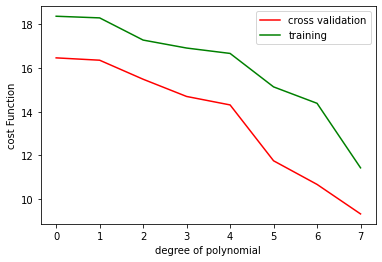

In [380]:
#tetsing all hypotheses
cost_cv = []
cost_train = []
for i in range(8):
    x_h = X[:,0:i+6]
    c,t = test_hypothesis(x_h,Y)
    cost_cv.append(c)
    cost_train.append(t)

plt.figure()
plt.plot(cost_cv,'r')
plt.plot(cost_train,'g')
plt.ylabel(f'cost Function')
plt.xlabel('degree of polynomial')
plt.legend(['cross validation','training'],loc='upper right')


## so obviously the best hypothesis is selecting all features 

In [381]:
reg2 = LinearRegression(learning_rate=0.03, iterations=1000)
reg2.fit(X,Y)
y_pred = reg2.predict(X_test)

print(f'Generaliztion error fot test set is {cost_function(y_pred,y_test)}')

Generaliztion error fot test set is 19.32907575402351
